In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from seaborn.distributions import distplot

# 데이터 정제 
#### - 종이책 독서율 성인/학생
#### - 전자책 독서율 성인/학생
#### - 오디오북 독서율 성인/학생

> 종이책 독서율 성인 

In [2]:
p_book_a = pd.read_excel('./data/종이책_독서율__성인__20220721142411.xlsx',usecols = 'B,C,D,E,F,H,I,K,L')
# p_book_a = p_book_a.drop([0], axis = 0)
p_book_a = p_book_a.drop([0], axis = 0)
p_book_a

C:\Users\82102\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,통계분류(2),2015,2015.1,2017,2017.1,2019,2019.1,2021,2021.1
1,소계,5000.0,34.7,6000.0,59.9,6000.0,52.1,6000.0,40.7
2,남성,2478.0,34.5,2988.0,58.2,2990.0,50.4,2991.0,40.4
3,여성,2522.0,34.8,3012.0,61.5,3010.0,53.9,3009.0,41.1
4,19~29세,911.0,13.4,1070.0,73.5,1057.0,70.4,1016.0,60.3
5,30~39세,932.0,22.9,1071.0,68.9,1022.0,68.7,964.0,56.3
6,40~49세,1030.0,27.8,1218.0,61.9,1158.0,57.6,1123.0,44.4
7,50~59세,988.0,39.8,1190.0,52.2,1192.0,43.5,1173.0,33.9
8,60세 이상,1140.0,63.1,1451.0,47.8,1571.0,31.5,1724.0,22.7
9,중졸 이하,906.0,69.2,1002.0,44.2,934.0,20.6,900.0,12.0
10,"고졸, 고퇴",1904.0,38.1,2120.0,49.3,2127.0,39.0,2136.0,29.2


In [3]:
p_book_a.columns = ['분류', '사례수_2015', '2015', '사례수_2017', '2017', '사례수_2019', '2019', '사례수_2021', '2021']
p_book_a

,분류,사례수_2015,2015,사례수_2017,2017,사례수_2019,2019,사례수_2021,2021
1,소계,5000.0,34.7,6000.0,59.9,6000.0,52.1,6000.0,40.7
2,남성,2478.0,34.5,2988.0,58.2,2990.0,50.4,2991.0,40.4
3,여성,2522.0,34.8,3012.0,61.5,3010.0,53.9,3009.0,41.1
4,19~29세,911.0,13.4,1070.0,73.5,1057.0,70.4,1016.0,60.3
5,30~39세,932.0,22.9,1071.0,68.9,1022.0,68.7,964.0,56.3
6,40~49세,1030.0,27.8,1218.0,61.9,1158.0,57.6,1123.0,44.4
7,50~59세,988.0,39.8,1190.0,52.2,1192.0,43.5,1173.0,33.9
8,60세 이상,1140.0,63.1,1451.0,47.8,1571.0,31.5,1724.0,22.7
9,중졸 이하,906.0,69.2,1002.0,44.2,934.0,20.6,900.0,12.0
10,"고졸, 고퇴",1904.0,38.1,2120.0,49.3,2127.0,39.0,2136.0,29.2


In [4]:
p_book_a['2015'] = 100 - p_book_a['2015']
p_book_a

,분류,사례수_2015,2015,사례수_2017,2017,사례수_2019,2019,사례수_2021,2021
1,소계,5000.0,65.3,6000.0,59.9,6000.0,52.1,6000.0,40.7
2,남성,2478.0,65.5,2988.0,58.2,2990.0,50.4,2991.0,40.4
3,여성,2522.0,65.2,3012.0,61.5,3010.0,53.9,3009.0,41.1
4,19~29세,911.0,86.6,1070.0,73.5,1057.0,70.4,1016.0,60.3
5,30~39세,932.0,77.1,1071.0,68.9,1022.0,68.7,964.0,56.3
6,40~49세,1030.0,72.2,1218.0,61.9,1158.0,57.6,1123.0,44.4
7,50~59세,988.0,60.2,1190.0,52.2,1192.0,43.5,1173.0,33.9
8,60세 이상,1140.0,36.9,1451.0,47.8,1571.0,31.5,1724.0,22.7
9,중졸 이하,906.0,30.8,1002.0,44.2,934.0,20.6,900.0,12.0
10,"고졸, 고퇴",1904.0,61.9,2120.0,49.3,2127.0,39.0,2136.0,29.2


In [5]:
p_book_a.to_excel('C:/STUDY/busan220608/미니프로젝트_2/data/정제_data/종이책_독서율_성인_수정.xlsx',index=False)

> 종이책 독서율 학생

In [6]:
p_book_s = pd.read_excel('./data/종이책_독서율__학생__20220721142426.xlsx',usecols = 'B,C,D,F,G,I,J,L,M')
p_book_s = p_book_s.drop([0], axis = 0)
p_book_s

C:\Users\82102\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,통계분류(2),2015,2015.1,2017,2017.1,2019,2019.1,2021,2021.1
1,소계,3000.0,5.1,3329.0,91.7,3126.0,90.7,3320.0,87.4
2,초등학교,845.0,0.6,945.0,96.8,1005.0,94.8,1117.0,93.2
3,중학교,1041.0,5.0,1085.0,92.5,985.0,91.6,1095.0,87.0
4,고등학교,1115.0,8.7,1298.0,87.2,1136.0,86.3,1108.0,82.1
5,초등학교-남,440.0,0.8,489.0,96.0,518.0,92.2,575.0,93.7
6,초등학교-여,404.0,0.4,456.0,97.8,487.0,97.5,541.0,92.7
7,중학교-남,544.0,5.5,567.0,91.7,512.0,88.1,566.0,84.0
8,중학교-여,496.0,4.6,519.0,93.4,473.0,95.4,529.0,90.2
9,고등학교-남,582.0,9.7,690.0,84.6,594.0,80.7,579.0,77.2
10,고등학교-여,533.0,7.6,608.0,90.0,542.0,92.5,529.0,87.4


In [7]:
p_book_s.columns = ['분류', '사례수_2015', '2015', '사례수_2017', '2017', '사례수_2019', '2019', '사례수_2021', '2021']
p_book_s

,분류,사례수_2015,2015,사례수_2017,2017,사례수_2019,2019,사례수_2021,2021
1,소계,3000.0,5.1,3329.0,91.7,3126.0,90.7,3320.0,87.4
2,초등학교,845.0,0.6,945.0,96.8,1005.0,94.8,1117.0,93.2
3,중학교,1041.0,5.0,1085.0,92.5,985.0,91.6,1095.0,87.0
4,고등학교,1115.0,8.7,1298.0,87.2,1136.0,86.3,1108.0,82.1
5,초등학교-남,440.0,0.8,489.0,96.0,518.0,92.2,575.0,93.7
6,초등학교-여,404.0,0.4,456.0,97.8,487.0,97.5,541.0,92.7
7,중학교-남,544.0,5.5,567.0,91.7,512.0,88.1,566.0,84.0
8,중학교-여,496.0,4.6,519.0,93.4,473.0,95.4,529.0,90.2
9,고등학교-남,582.0,9.7,690.0,84.6,594.0,80.7,579.0,77.2
10,고등학교-여,533.0,7.6,608.0,90.0,542.0,92.5,529.0,87.4


In [8]:
p_book_s['2015'] = 100 - p_book_s['2015']
p_book_s

,분류,사례수_2015,2015,사례수_2017,2017,사례수_2019,2019,사례수_2021,2021
1,소계,3000.0,94.9,3329.0,91.7,3126.0,90.7,3320.0,87.4
2,초등학교,845.0,99.4,945.0,96.8,1005.0,94.8,1117.0,93.2
3,중학교,1041.0,95.0,1085.0,92.5,985.0,91.6,1095.0,87.0
4,고등학교,1115.0,91.3,1298.0,87.2,1136.0,86.3,1108.0,82.1
5,초등학교-남,440.0,99.2,489.0,96.0,518.0,92.2,575.0,93.7
6,초등학교-여,404.0,99.6,456.0,97.8,487.0,97.5,541.0,92.7
7,중학교-남,544.0,94.5,567.0,91.7,512.0,88.1,566.0,84.0
8,중학교-여,496.0,95.4,519.0,93.4,473.0,95.4,529.0,90.2
9,고등학교-남,582.0,90.3,690.0,84.6,594.0,80.7,579.0,77.2
10,고등학교-여,533.0,92.4,608.0,90.0,542.0,92.5,529.0,87.4


In [9]:
p_book_s.to_excel('C:/STUDY/busan220608/미니프로젝트_2/data/정제_data/종이책_독서율_학생_수정.xlsx',index=False)

> 전자책 독서율 성인 

In [10]:
e_book_a = pd.read_excel('./data/전자책_독서율__성인__20220721143441.xlsx',usecols = 'B,C,D,F,G,I,J,L,M')
e_book_a = e_book_a.drop([0], axis = 0)
e_book_a

C:\Users\82102\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,통계분류(2),2015,2015.1,2017,2017.1,2019,2019.1,2021,2021.1
1,소계,5000.0,10.2,6000.0,14.1,6000.0,16.5,6000.0,19.0
2,남성,2478.0,11.6,2988.0,15.8,2990.0,17.9,2991.0,20.1
3,여성,2522.0,8.8,3012.0,12.3,3010.0,15.1,3009.0,17.9
4,19~29세,911.0,27.8,1070.0,34.7,1057.0,39.0,1016.0,50.5
5,30~39세,932.0,14.2,1071.0,22.7,1022.0,31.3,964.0,38.4
6,40~49세,1030.0,7.7,1218.0,13.8,1158.0,14.4,1123.0,13.8
7,50~59세,988.0,3.5,1190.0,3.5,1192.0,4.9,1173.0,5.2
8,60세 이상,1140.0,1.0,1451.0,1.3,1571.0,2.0,1724.0,2.3
9,중졸 이하,906.0,0.4,1002.0,1.4,934.0,0.6,900.0,0.2
10,"고졸, 고퇴",1904.0,5.4,2120.0,5.0,2127.0,7.0,2136.0,5.6


In [11]:
e_book_a.columns = ['분류', '사례수_2015', '2015', '사례수_2017', '2017', '사례수_2019', '2019', '사례수_2021', '2021']
e_book_a

,분류,사례수_2015,2015,사례수_2017,2017,사례수_2019,2019,사례수_2021,2021
1,소계,5000.0,10.2,6000.0,14.1,6000.0,16.5,6000.0,19.0
2,남성,2478.0,11.6,2988.0,15.8,2990.0,17.9,2991.0,20.1
3,여성,2522.0,8.8,3012.0,12.3,3010.0,15.1,3009.0,17.9
4,19~29세,911.0,27.8,1070.0,34.7,1057.0,39.0,1016.0,50.5
5,30~39세,932.0,14.2,1071.0,22.7,1022.0,31.3,964.0,38.4
6,40~49세,1030.0,7.7,1218.0,13.8,1158.0,14.4,1123.0,13.8
7,50~59세,988.0,3.5,1190.0,3.5,1192.0,4.9,1173.0,5.2
8,60세 이상,1140.0,1.0,1451.0,1.3,1571.0,2.0,1724.0,2.3
9,중졸 이하,906.0,0.4,1002.0,1.4,934.0,0.6,900.0,0.2
10,"고졸, 고퇴",1904.0,5.4,2120.0,5.0,2127.0,7.0,2136.0,5.6


In [12]:
e_book_a.to_excel('C:/STUDY/busan220608/미니프로젝트_2/data/정제_data/전자책_독서율_성인_수정.xlsx',index=False)

> 전자책 독서율 학생

In [13]:
e_book_s = pd.read_excel('./data/전자책_독서율__학생__20220721142455.xlsx',usecols = 'B,C,D,F,G,I,J,L,M')
e_book_s = e_book_s.drop([0], axis = 0)
e_book_s

C:\Users\82102\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,통계분류(2),2015,2015.1,2017,2017.1,2019,2019.1,2021,2021.1
1,소계,3000.0,27.1,3329.0,29.8,3126.0,37.2,3320.0,49.1
2,초등학교,845.0,33.7,945.0,34.1,1005.0,40.8,1117.0,48.9
3,중학교,1041.0,26.9,1085.0,30.0,985.0,30.6,1095.0,50.9
4,고등학교,1115.0,22.3,1298.0,26.5,1136.0,39.8,1108.0,47.4
5,초등학교-남,440.0,29.8,489.0,27.5,518.0,38.3,575.0,39.0
6,초등학교-여,404.0,37.9,456.0,41.3,487.0,43.5,541.0,59.4
7,중학교-남,544.0,20.0,567.0,24.8,512.0,23.6,566.0,44.9
8,중학교-여,496.0,34.4,519.0,35.5,473.0,38.2,529.0,57.4
9,고등학교-남,582.0,22.0,690.0,24.8,594.0,36.8,579.0,43.3
10,고등학교-여,533.0,22.5,608.0,28.5,542.0,43.0,529.0,51.8


In [14]:
e_book_s.columns = ['분류', '사례수_2015', '2015', '사례수_2017', '2017', '사례수_2019', '2019', '사례수_2021', '2021']
e_book_s

,분류,사례수_2015,2015,사례수_2017,2017,사례수_2019,2019,사례수_2021,2021
1,소계,3000.0,27.1,3329.0,29.8,3126.0,37.2,3320.0,49.1
2,초등학교,845.0,33.7,945.0,34.1,1005.0,40.8,1117.0,48.9
3,중학교,1041.0,26.9,1085.0,30.0,985.0,30.6,1095.0,50.9
4,고등학교,1115.0,22.3,1298.0,26.5,1136.0,39.8,1108.0,47.4
5,초등학교-남,440.0,29.8,489.0,27.5,518.0,38.3,575.0,39.0
6,초등학교-여,404.0,37.9,456.0,41.3,487.0,43.5,541.0,59.4
7,중학교-남,544.0,20.0,567.0,24.8,512.0,23.6,566.0,44.9
8,중학교-여,496.0,34.4,519.0,35.5,473.0,38.2,529.0,57.4
9,고등학교-남,582.0,22.0,690.0,24.8,594.0,36.8,579.0,43.3
10,고등학교-여,533.0,22.5,608.0,28.5,542.0,43.0,529.0,51.8


In [15]:
e_book_s.to_excel('C:/STUDY/busan220608/미니프로젝트_2/data/정제_data/전자책_독서율_학생_수정.xlsx',index=False)

> 오디오북 독서율 성인

In [16]:
a_book_a = pd.read_excel('./data/오디오북_독서율__성인__20220721142510.xlsx',usecols = 'B,C,D,F,G')
a_book_a = a_book_a.drop([0], axis = 0)
a_book_a

C:\Users\82102\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,통계분류(2),2019,2019.1,2021,2021.1
1,소계,6000.0,3.5,6000.0,4.5
2,남성,2990.0,2.8,2991.0,4.7
3,여성,3010.0,4.1,3009.0,4.4
4,19~29세,1057.0,6.5,1016.0,12.0
5,30~39세,1022.0,6.2,964.0,8.8
6,40~49세,1158.0,4.2,1123.0,3.9
7,50~59세,1192.0,1.6,1173.0,1.0
8,60세 이상,1571.0,0.6,1724.0,0.6
9,중졸 이하,934.0,0.4,900.0,0.0
10,고졸/고퇴,2127.0,1.3,2136.0,1.4


In [17]:
a_book_a.columns = ['분류', '사례수_2019', '2019', '사례수_2021', '2021']
a_book_a

,분류,사례수_2019,2019,사례수_2021,2021
1,소계,6000.0,3.5,6000.0,4.5
2,남성,2990.0,2.8,2991.0,4.7
3,여성,3010.0,4.1,3009.0,4.4
4,19~29세,1057.0,6.5,1016.0,12.0
5,30~39세,1022.0,6.2,964.0,8.8
6,40~49세,1158.0,4.2,1123.0,3.9
7,50~59세,1192.0,1.6,1173.0,1.0
8,60세 이상,1571.0,0.6,1724.0,0.6
9,중졸 이하,934.0,0.4,900.0,0.0
10,고졸/고퇴,2127.0,1.3,2136.0,1.4


In [18]:
a_book_a.to_excel('C:/STUDY/busan220608/미니프로젝트_2/data/정제_data/오디오북_독서율_성인_수정.xlsx',index=False)

> 오디오북 독서율 학생

In [19]:
a_book_s = pd.read_excel('./data/오디오북_독서율__학생__20220721144359.xlsx',usecols = 'B,C,D,E,G,H')
a_book_s = a_book_s.drop([0], axis = 0)
a_book_s

C:\Users\82102\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,통계분류(2),통계분류(3),2019,2019.1,2021,2021.1
1,소계,소계,3126.0,18.7,3320.0,14.3
2,초등학교,소계,1005.0,30.9,1117.0,23.3
3,중학교,소계,985.0,11.6,1095.0,11.6
4,고등학교,소계,1136.0,13.9,1108.0,7.8
5,초등학교,남,518.0,27.8,575.0,19.7
6,NaN,여,487.0,34.2,541.0,27.1
7,중학교,남,512.0,8.3,566.0,9.4
8,NaN,여,473.0,15.2,529.0,14.0
9,고등학교,남,594.0,13.1,579.0,6.8
10,NaN,여,542.0,14.8,529.0,8.9


In [20]:
a_book_s.loc[5, '통계분류(2)'] = '초등학교-남'
a_book_s.loc[6, '통계분류(2)'] = '초등학교-여'
a_book_s.loc[7, '통계분류(2)'] = '중학교-남'
a_book_s.loc[8, '통계분류(2)'] = '중학교-여'
a_book_s.loc[9, '통계분류(2)'] = '고등학교-남'
a_book_s.loc[10, '통계분류(2)'] = '고등학교-여'
a_book_s.loc[11, '통계분류(2)'] = '초등학교 4학년'
a_book_s.loc[12, '통계분류(2)'] = '초등학교 5학년'
a_book_s.loc[13, '통계분류(2)'] = '초등학교 6학년'
a_book_s.loc[14, '통계분류(2)'] = '중학교 1학년'
a_book_s.loc[15, '통계분류(2)'] = '중학교 2학년'
a_book_s.loc[16, '통계분류(2)'] = '중학교 3학년'
a_book_s.loc[17, '통계분류(2)'] = '고등학교 1학년'
a_book_s.loc[18, '통계분류(2)'] = '고등학교 2학년'
a_book_s.loc[19, '통계분류(2)'] = '고등학교 3학년'
a_book_s.columns = ['분류','분류상세', '사례수_2019', '2019', '사례수_2021', '2021']
a_book_s = a_book_s[['분류','사례수_2019', '2019', '사례수_2021', '2021']]
a_book_s


,분류,사례수_2019,2019,사례수_2021,2021
1,소계,3126.0,18.7,3320.0,14.3
2,초등학교,1005.0,30.9,1117.0,23.3
3,중학교,985.0,11.6,1095.0,11.6
4,고등학교,1136.0,13.9,1108.0,7.8
5,초등학교-남,518.0,27.8,575.0,19.7
6,초등학교-여,487.0,34.2,541.0,27.1
7,중학교-남,512.0,8.3,566.0,9.4
8,중학교-여,473.0,15.2,529.0,14.0
9,고등학교-남,594.0,13.1,579.0,6.8
10,고등학교-여,542.0,14.8,529.0,8.9


In [21]:
a_book_s.to_excel('C:/STUDY/busan220608/미니프로젝트_2/data/정제_data/오디오북_독서율_학생_수정.xlsx',index=False)

> 종이책 독서량 성인 

In [22]:
p_book_a['2015년'] = p_book_a['사례수_2015']*p_book_a['2015']*0.01
p_book_a['2017년'] = p_book_a['사례수_2017']*p_book_a['2017']*0.01
p_book_a['2019년'] = p_book_a['사례수_2019']*p_book_a['2019']*0.01
p_book_a['2021년'] = p_book_a['사례수_2021']*p_book_a['2021']*0.01
p_book_a

,분류,사례수_2015,2015,사례수_2017,2017,사례수_2019,2019,사례수_2021,2021,2015년,2017년,2019년,2021년
1,소계,5000.0,65.3,6000.0,59.9,6000.0,52.1,6000.0,40.7,3265.0,3594.0,3126.0,2442.0
2,남성,2478.0,65.5,2988.0,58.2,2990.0,50.4,2991.0,40.4,1623.09,1739.016,1506.96,1208.364
3,여성,2522.0,65.2,3012.0,61.5,3010.0,53.9,3009.0,41.1,1644.344,1852.38,1622.39,1236.699
4,19~29세,911.0,86.6,1070.0,73.5,1057.0,70.4,1016.0,60.3,788.926,786.45,744.128,612.648
5,30~39세,932.0,77.1,1071.0,68.9,1022.0,68.7,964.0,56.3,718.572,737.919,702.114,542.732
6,40~49세,1030.0,72.2,1218.0,61.9,1158.0,57.6,1123.0,44.4,743.66,753.942,667.008,498.612
7,50~59세,988.0,60.2,1190.0,52.2,1192.0,43.5,1173.0,33.9,594.776,621.18,518.52,397.647
8,60세 이상,1140.0,36.9,1451.0,47.8,1571.0,31.5,1724.0,22.7,420.66,693.578,494.865,391.348
9,중졸 이하,906.0,30.8,1002.0,44.2,934.0,20.6,900.0,12.0,279.048,442.884,192.404,108.0
10,"고졸, 고퇴",1904.0,61.9,2120.0,49.3,2127.0,39.0,2136.0,29.2,1178.576,1045.16,829.53,623.712


In [23]:
p_book_a= p_book_a[['분류','2015년','2017년','2019년','2021년']]
p_book_a

,분류,2015년,2017년,2019년,2021년
1,소계,3265.0,3594.0,3126.0,2442.0
2,남성,1623.09,1739.016,1506.96,1208.364
3,여성,1644.344,1852.38,1622.39,1236.699
4,19~29세,788.926,786.45,744.128,612.648
5,30~39세,718.572,737.919,702.114,542.732
6,40~49세,743.66,753.942,667.008,498.612
7,50~59세,594.776,621.18,518.52,397.647
8,60세 이상,420.66,693.578,494.865,391.348
9,중졸 이하,279.048,442.884,192.404,108.0
10,"고졸, 고퇴",1178.576,1045.16,829.53,623.712


In [24]:
p_book_a.to_excel('C:/STUDY/busan220608/미니프로젝트_2/data/정제_data/종이책_독서량_성인.xlsx',index=False)

> 종이책 독서량 학생

In [25]:
p_book_s

,분류,사례수_2015,2015,사례수_2017,2017,사례수_2019,2019,사례수_2021,2021
1,소계,3000.0,94.9,3329.0,91.7,3126.0,90.7,3320.0,87.4
2,초등학교,845.0,99.4,945.0,96.8,1005.0,94.8,1117.0,93.2
3,중학교,1041.0,95.0,1085.0,92.5,985.0,91.6,1095.0,87.0
4,고등학교,1115.0,91.3,1298.0,87.2,1136.0,86.3,1108.0,82.1
5,초등학교-남,440.0,99.2,489.0,96.0,518.0,92.2,575.0,93.7
6,초등학교-여,404.0,99.6,456.0,97.8,487.0,97.5,541.0,92.7
7,중학교-남,544.0,94.5,567.0,91.7,512.0,88.1,566.0,84.0
8,중학교-여,496.0,95.4,519.0,93.4,473.0,95.4,529.0,90.2
9,고등학교-남,582.0,90.3,690.0,84.6,594.0,80.7,579.0,77.2
10,고등학교-여,533.0,92.4,608.0,90.0,542.0,92.5,529.0,87.4


In [26]:
p_book_s['2015년'] = p_book_s['사례수_2015']*p_book_s['2015']*0.01
p_book_s['2017년'] = p_book_s['사례수_2017']*p_book_s['2017']*0.01
p_book_s['2019년'] = p_book_s['사례수_2019']*p_book_s['2019']*0.01
p_book_s['2021년'] = p_book_s['사례수_2021']*p_book_s['2021']*0.01
p_book_s

,분류,사례수_2015,2015,사례수_2017,2017,사례수_2019,2019,사례수_2021,2021,2015년,2017년,2019년,2021년
1,소계,3000.0,94.9,3329.0,91.7,3126.0,90.7,3320.0,87.4,2847.0,3052.693,2835.282,2901.68
2,초등학교,845.0,99.4,945.0,96.8,1005.0,94.8,1117.0,93.2,839.93,914.76,952.74,1041.044
3,중학교,1041.0,95.0,1085.0,92.5,985.0,91.6,1095.0,87.0,988.95,1003.625,902.26,952.65
4,고등학교,1115.0,91.3,1298.0,87.2,1136.0,86.3,1108.0,82.1,1017.995,1131.856,980.368,909.668
5,초등학교-남,440.0,99.2,489.0,96.0,518.0,92.2,575.0,93.7,436.48,469.44,477.596,538.775
6,초등학교-여,404.0,99.6,456.0,97.8,487.0,97.5,541.0,92.7,402.384,445.968,474.825,501.507
7,중학교-남,544.0,94.5,567.0,91.7,512.0,88.1,566.0,84.0,514.08,519.939,451.072,475.44
8,중학교-여,496.0,95.4,519.0,93.4,473.0,95.4,529.0,90.2,473.184,484.746,451.242,477.158
9,고등학교-남,582.0,90.3,690.0,84.6,594.0,80.7,579.0,77.2,525.546,583.74,479.358,446.988
10,고등학교-여,533.0,92.4,608.0,90.0,542.0,92.5,529.0,87.4,492.492,547.2,501.35,462.346


In [27]:
p_book_s= p_book_s[['분류','2015년','2017년','2019년','2021년']]
p_book_s

,분류,2015년,2017년,2019년,2021년
1,소계,2847.0,3052.693,2835.282,2901.68
2,초등학교,839.93,914.76,952.74,1041.044
3,중학교,988.95,1003.625,902.26,952.65
4,고등학교,1017.995,1131.856,980.368,909.668
5,초등학교-남,436.48,469.44,477.596,538.775
6,초등학교-여,402.384,445.968,474.825,501.507
7,중학교-남,514.08,519.939,451.072,475.44
8,중학교-여,473.184,484.746,451.242,477.158
9,고등학교-남,525.546,583.74,479.358,446.988
10,고등학교-여,492.492,547.2,501.35,462.346


In [28]:
p_book_s.to_excel('C:/STUDY/busan220608/미니프로젝트_2/data/정제_data/종이책_독서량_학생.xlsx',index=False)

> 전자책 독서율 성인

In [29]:
e_book_a

,분류,사례수_2015,2015,사례수_2017,2017,사례수_2019,2019,사례수_2021,2021
1,소계,5000.0,10.2,6000.0,14.1,6000.0,16.5,6000.0,19.0
2,남성,2478.0,11.6,2988.0,15.8,2990.0,17.9,2991.0,20.1
3,여성,2522.0,8.8,3012.0,12.3,3010.0,15.1,3009.0,17.9
4,19~29세,911.0,27.8,1070.0,34.7,1057.0,39.0,1016.0,50.5
5,30~39세,932.0,14.2,1071.0,22.7,1022.0,31.3,964.0,38.4
6,40~49세,1030.0,7.7,1218.0,13.8,1158.0,14.4,1123.0,13.8
7,50~59세,988.0,3.5,1190.0,3.5,1192.0,4.9,1173.0,5.2
8,60세 이상,1140.0,1.0,1451.0,1.3,1571.0,2.0,1724.0,2.3
9,중졸 이하,906.0,0.4,1002.0,1.4,934.0,0.6,900.0,0.2
10,"고졸, 고퇴",1904.0,5.4,2120.0,5.0,2127.0,7.0,2136.0,5.6


In [30]:
e_book_a['2015년'] = e_book_a['사례수_2015']*e_book_a['2015']*0.01
e_book_a['2017년'] = e_book_a['사례수_2017']*e_book_a['2017']*0.01
e_book_a['2019년'] = e_book_a['사례수_2019']*e_book_a['2019']*0.01
e_book_a['2021년'] = e_book_a['사례수_2021']*e_book_a['2021']*0.01
e_book_a

,분류,사례수_2015,2015,사례수_2017,2017,사례수_2019,2019,사례수_2021,2021,2015년,2017년,2019년,2021년
1,소계,5000.0,10.2,6000.0,14.1,6000.0,16.5,6000.0,19.0,510.0,846.0,990.0,1140.0
2,남성,2478.0,11.6,2988.0,15.8,2990.0,17.9,2991.0,20.1,287.448,472.104,535.21,601.191
3,여성,2522.0,8.8,3012.0,12.3,3010.0,15.1,3009.0,17.9,221.936,370.476,454.51,538.611
4,19~29세,911.0,27.8,1070.0,34.7,1057.0,39.0,1016.0,50.5,253.258,371.29,412.23,513.08
5,30~39세,932.0,14.2,1071.0,22.7,1022.0,31.3,964.0,38.4,132.344,243.117,319.886,370.176
6,40~49세,1030.0,7.7,1218.0,13.8,1158.0,14.4,1123.0,13.8,79.31,168.084,166.752,154.974
7,50~59세,988.0,3.5,1190.0,3.5,1192.0,4.9,1173.0,5.2,34.58,41.65,58.408,60.996
8,60세 이상,1140.0,1.0,1451.0,1.3,1571.0,2.0,1724.0,2.3,11.4,18.863,31.42,39.652
9,중졸 이하,906.0,0.4,1002.0,1.4,934.0,0.6,900.0,0.2,3.624,14.028,5.604,1.8
10,"고졸, 고퇴",1904.0,5.4,2120.0,5.0,2127.0,7.0,2136.0,5.6,102.816,106.0,148.89,119.616


In [31]:
e_book_a= e_book_a[['분류','2015년','2017년','2019년','2021년']]
e_book_a

,분류,2015년,2017년,2019년,2021년
1,소계,510.0,846.0,990.0,1140.0
2,남성,287.448,472.104,535.21,601.191
3,여성,221.936,370.476,454.51,538.611
4,19~29세,253.258,371.29,412.23,513.08
5,30~39세,132.344,243.117,319.886,370.176
6,40~49세,79.31,168.084,166.752,154.974
7,50~59세,34.58,41.65,58.408,60.996
8,60세 이상,11.4,18.863,31.42,39.652
9,중졸 이하,3.624,14.028,5.604,1.8
10,"고졸, 고퇴",102.816,106.0,148.89,119.616


In [32]:
e_book_a.to_excel('C:/STUDY/busan220608/미니프로젝트_2/data/정제_data/전자책_독서량_성인.xlsx',index=False)

> 전자책 독서율 학생

In [33]:
e_book_s

,분류,사례수_2015,2015,사례수_2017,2017,사례수_2019,2019,사례수_2021,2021
1,소계,3000.0,27.1,3329.0,29.8,3126.0,37.2,3320.0,49.1
2,초등학교,845.0,33.7,945.0,34.1,1005.0,40.8,1117.0,48.9
3,중학교,1041.0,26.9,1085.0,30.0,985.0,30.6,1095.0,50.9
4,고등학교,1115.0,22.3,1298.0,26.5,1136.0,39.8,1108.0,47.4
5,초등학교-남,440.0,29.8,489.0,27.5,518.0,38.3,575.0,39.0
6,초등학교-여,404.0,37.9,456.0,41.3,487.0,43.5,541.0,59.4
7,중학교-남,544.0,20.0,567.0,24.8,512.0,23.6,566.0,44.9
8,중학교-여,496.0,34.4,519.0,35.5,473.0,38.2,529.0,57.4
9,고등학교-남,582.0,22.0,690.0,24.8,594.0,36.8,579.0,43.3
10,고등학교-여,533.0,22.5,608.0,28.5,542.0,43.0,529.0,51.8


In [34]:
e_book_s['2015년'] = e_book_s['사례수_2015']*e_book_s['2015']*0.01
e_book_s['2017년'] = e_book_s['사례수_2017']*e_book_s['2017']*0.01
e_book_s['2019년'] = e_book_s['사례수_2019']*e_book_s['2019']*0.01
e_book_s['2021년'] = e_book_s['사례수_2021']*e_book_s['2021']*0.01
e_book_s

,분류,사례수_2015,2015,사례수_2017,2017,사례수_2019,2019,사례수_2021,2021,2015년,2017년,2019년,2021년
1,소계,3000.0,27.1,3329.0,29.8,3126.0,37.2,3320.0,49.1,813.0,992.042,1162.872,1630.12
2,초등학교,845.0,33.7,945.0,34.1,1005.0,40.8,1117.0,48.9,284.765,322.245,410.04,546.213
3,중학교,1041.0,26.9,1085.0,30.0,985.0,30.6,1095.0,50.9,280.029,325.5,301.41,557.355
4,고등학교,1115.0,22.3,1298.0,26.5,1136.0,39.8,1108.0,47.4,248.645,343.97,452.128,525.192
5,초등학교-남,440.0,29.8,489.0,27.5,518.0,38.3,575.0,39.0,131.12,134.475,198.394,224.25
6,초등학교-여,404.0,37.9,456.0,41.3,487.0,43.5,541.0,59.4,153.116,188.328,211.845,321.354
7,중학교-남,544.0,20.0,567.0,24.8,512.0,23.6,566.0,44.9,108.8,140.616,120.832,254.134
8,중학교-여,496.0,34.4,519.0,35.5,473.0,38.2,529.0,57.4,170.624,184.245,180.686,303.646
9,고등학교-남,582.0,22.0,690.0,24.8,594.0,36.8,579.0,43.3,128.04,171.12,218.592,250.707
10,고등학교-여,533.0,22.5,608.0,28.5,542.0,43.0,529.0,51.8,119.925,173.28,233.06,274.022


In [35]:
e_book_s= e_book_s[['분류','2015년','2017년','2019년','2021년']]
e_book_s

,분류,2015년,2017년,2019년,2021년
1,소계,813.0,992.042,1162.872,1630.12
2,초등학교,284.765,322.245,410.04,546.213
3,중학교,280.029,325.5,301.41,557.355
4,고등학교,248.645,343.97,452.128,525.192
5,초등학교-남,131.12,134.475,198.394,224.25
6,초등학교-여,153.116,188.328,211.845,321.354
7,중학교-남,108.8,140.616,120.832,254.134
8,중학교-여,170.624,184.245,180.686,303.646
9,고등학교-남,128.04,171.12,218.592,250.707
10,고등학교-여,119.925,173.28,233.06,274.022


In [36]:
e_book_s.to_excel('C:/STUDY/busan220608/미니프로젝트_2/data/정제_data/전자책_독서량_학생.xlsx',index=False)

> 오디오북 독서량 성인

In [37]:
a_book_a

,분류,사례수_2019,2019,사례수_2021,2021
1,소계,6000.0,3.5,6000.0,4.5
2,남성,2990.0,2.8,2991.0,4.7
3,여성,3010.0,4.1,3009.0,4.4
4,19~29세,1057.0,6.5,1016.0,12.0
5,30~39세,1022.0,6.2,964.0,8.8
6,40~49세,1158.0,4.2,1123.0,3.9
7,50~59세,1192.0,1.6,1173.0,1.0
8,60세 이상,1571.0,0.6,1724.0,0.6
9,중졸 이하,934.0,0.4,900.0,0.0
10,고졸/고퇴,2127.0,1.3,2136.0,1.4


In [38]:
a_book_a['2019년'] = a_book_a['사례수_2019']*a_book_a['2019']*0.01
a_book_a['2021년'] = a_book_a['사례수_2021']*a_book_a['2021']*0.01
a_book_a

,분류,사례수_2019,2019,사례수_2021,2021,2019년,2021년
1,소계,6000.0,3.5,6000.0,4.5,210.0,270.0
2,남성,2990.0,2.8,2991.0,4.7,83.72,140.577
3,여성,3010.0,4.1,3009.0,4.4,123.41,132.396
4,19~29세,1057.0,6.5,1016.0,12.0,68.705,121.92
5,30~39세,1022.0,6.2,964.0,8.8,63.364,84.832
6,40~49세,1158.0,4.2,1123.0,3.9,48.636,43.797
7,50~59세,1192.0,1.6,1173.0,1.0,19.072,11.73
8,60세 이상,1571.0,0.6,1724.0,0.6,9.426,10.344
9,중졸 이하,934.0,0.4,900.0,0.0,3.736,0.0
10,고졸/고퇴,2127.0,1.3,2136.0,1.4,27.651,29.904


In [39]:
a_book_a= a_book_a[['분류','2019년','2021년']]
a_book_a

,분류,2019년,2021년
1,소계,210.0,270.0
2,남성,83.72,140.577
3,여성,123.41,132.396
4,19~29세,68.705,121.92
5,30~39세,63.364,84.832
6,40~49세,48.636,43.797
7,50~59세,19.072,11.73
8,60세 이상,9.426,10.344
9,중졸 이하,3.736,0.0
10,고졸/고퇴,27.651,29.904


In [40]:
a_book_a.to_excel('C:/STUDY/busan220608/미니프로젝트_2/data/정제_data/오디오북_독서량_성인.xlsx',index=False)

> 오디오북 독서량 학생

In [41]:
a_book_s

,분류,사례수_2019,2019,사례수_2021,2021
1,소계,3126.0,18.7,3320.0,14.3
2,초등학교,1005.0,30.9,1117.0,23.3
3,중학교,985.0,11.6,1095.0,11.6
4,고등학교,1136.0,13.9,1108.0,7.8
5,초등학교-남,518.0,27.8,575.0,19.7
6,초등학교-여,487.0,34.2,541.0,27.1
7,중학교-남,512.0,8.3,566.0,9.4
8,중학교-여,473.0,15.2,529.0,14.0
9,고등학교-남,594.0,13.1,579.0,6.8
10,고등학교-여,542.0,14.8,529.0,8.9


In [42]:
a_book_s['2019년'] = a_book_s['사례수_2019']*a_book_s['2019']*0.01
a_book_s['2021년'] = a_book_s['사례수_2021']*a_book_s['2021']*0.01
a_book_s

,분류,사례수_2019,2019,사례수_2021,2021,2019년,2021년
1,소계,3126.0,18.7,3320.0,14.3,584.562,474.76
2,초등학교,1005.0,30.9,1117.0,23.3,310.545,260.261
3,중학교,985.0,11.6,1095.0,11.6,114.26,127.02
4,고등학교,1136.0,13.9,1108.0,7.8,157.904,86.424
5,초등학교-남,518.0,27.8,575.0,19.7,144.004,113.275
6,초등학교-여,487.0,34.2,541.0,27.1,166.554,146.611
7,중학교-남,512.0,8.3,566.0,9.4,42.496,53.204
8,중학교-여,473.0,15.2,529.0,14.0,71.896,74.06
9,고등학교-남,594.0,13.1,579.0,6.8,77.814,39.372
10,고등학교-여,542.0,14.8,529.0,8.9,80.216,47.081


In [43]:
a_book_s= a_book_s[['분류','2019년','2021년']]
a_book_s

,분류,2019년,2021년
1,소계,584.562,474.76
2,초등학교,310.545,260.261
3,중학교,114.26,127.02
4,고등학교,157.904,86.424
5,초등학교-남,144.004,113.275
6,초등학교-여,166.554,146.611
7,중학교-남,42.496,53.204
8,중학교-여,71.896,74.06
9,고등학교-남,77.814,39.372
10,고등학교-여,80.216,47.081


In [44]:
a_book_s.to_excel('C:/STUDY/busan220608/미니프로젝트_2/data/정제_data/오디오북_독서량_학생.xlsx',index=False)

# 일원화 분석 

#### 1. 성별에 따른 독서량 

In [45]:
p_book_a['총사례'] = p_book_a['2015년']+ p_book_a['2017년']+ p_book_a['2019년']+ p_book_a['2021년']
p_book_a

C:\Users\82102\AppData\Local\Temp\ipykernel_14488\2301339533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_book_a['총사례'] = p_book_a['2015년']+ p_book_a['2017년']+ p_book_a['2019년']+ p_book_a['2021년']


,분류,2015년,2017년,2019년,2021년,총사례
1,소계,3265.0,3594.0,3126.0,2442.0,12427.0
2,남성,1623.09,1739.016,1506.96,1208.364,6077.43
3,여성,1644.344,1852.38,1622.39,1236.699,6355.813
4,19~29세,788.926,786.45,744.128,612.648,2932.152
5,30~39세,718.572,737.919,702.114,542.732,2701.337
6,40~49세,743.66,753.942,667.008,498.612,2663.222
7,50~59세,594.776,621.18,518.52,397.647,2132.123
8,60세 이상,420.66,693.578,494.865,391.348,2000.451
9,중졸 이하,279.048,442.884,192.404,108.0,1022.336
10,"고졸, 고퇴",1178.576,1045.16,829.53,623.712,3676.978


In [46]:
e_book_a['총사례'] = e_book_a['2015년']+ e_book_a['2017년']+ e_book_a['2019년']+ e_book_a['2021년']
e_book_a

C:\Users\82102\AppData\Local\Temp\ipykernel_14488\1807105686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_book_a['총사례'] = e_book_a['2015년']+ e_book_a['2017년']+ e_book_a['2019년']+ e_book_a['2021년']


,분류,2015년,2017년,2019년,2021년,총사례
1,소계,510.0,846.0,990.0,1140.0,3486.0
2,남성,287.448,472.104,535.21,601.191,1895.953
3,여성,221.936,370.476,454.51,538.611,1585.533
4,19~29세,253.258,371.29,412.23,513.08,1549.858
5,30~39세,132.344,243.117,319.886,370.176,1065.523
6,40~49세,79.31,168.084,166.752,154.974,569.12
7,50~59세,34.58,41.65,58.408,60.996,195.634
8,60세 이상,11.4,18.863,31.42,39.652,101.335
9,중졸 이하,3.624,14.028,5.604,1.8,25.056
10,"고졸, 고퇴",102.816,106.0,148.89,119.616,477.322


In [47]:
a_book_a['총사례'] =  a_book_a['2019년']+ a_book_a['2021년']
a_book_a

C:\Users\82102\AppData\Local\Temp\ipykernel_14488\4205673490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_book_a['총사례'] =  a_book_a['2019년']+ a_book_a['2021년']


,분류,2019년,2021년,총사례
1,소계,210.0,270.0,480.0
2,남성,83.72,140.577,224.297
3,여성,123.41,132.396,255.806
4,19~29세,68.705,121.92,190.625
5,30~39세,63.364,84.832,148.196
6,40~49세,48.636,43.797,92.433
7,50~59세,19.072,11.73,30.802
8,60세 이상,9.426,10.344,19.77
9,중졸 이하,3.736,0.0,3.736
10,고졸/고퇴,27.651,29.904,57.555


In [48]:
p_book_a_new = p_book_a.loc[2:3]
e_book_a_new = e_book_a.loc[2:3]
a_book_a_new = a_book_a.loc[2:3]

p_book_a_new = p_book_a_new[['분류','총사례']]
e_book_a_new = e_book_a_new[['분류','총사례']]
a_book_a_new = a_book_a_new[['분류','총사례']]

In [49]:
p_book_a_new

,분류,총사례
2,남성,6077.43
3,여성,6355.813


In [50]:
e_book_a_new

,분류,총사례
2,남성,1895.953
3,여성,1585.533


In [51]:
a_book_a_new

,분류,총사례
2,남성,224.297
3,여성,255.806


In [52]:
book_gender = pd.DataFrame()
book_gender= pd.concat([book_gender,p_book_a_new ,e_book_a_new,a_book_a_new ],ignore_index=False)
book_gender

,분류,총사례
2,남성,6077.43
3,여성,6355.813
2,남성,1895.953
3,여성,1585.533
2,남성,224.297
3,여성,255.806


In [53]:
book_gender = book_gender.reset_index(drop=True)

In [54]:
book_gender

,분류,총사례
0,남성,6077.43
1,여성,6355.813
2,남성,1895.953
3,여성,1585.533
4,남성,224.297
5,여성,255.806


In [55]:
df = book_gender.groupby('분류').sum()
df

,총사례
분류,
남성,8197.680
여성,8197.152


In [56]:
# 귀무가설 : 성별에 따른 독서량 차이가 없다
# 대립가설 : 성별에 따른 독서량 차이가 있다 

### 검증하기
result = stats.chisquare(df["총사례"])

print("검정결과 = ", result)
print("검정 통계량 = %.3f,   p-value = %.3f" %(result))

# (해석 - 검증결과)
#  1. p-value=0.997 > 0.05 이므로, 대립가설 기각
#  2. 귀무가설 채택 : 성인남녀 성별에 따른 독서량 차이는 없다. 

검정결과 =  Power_divergenceResult(statistic=1.700438284456109e-05, pvalue=0.9967098229566378)
검정 통계량 = 0.000,   p-value = 0.997


#### 2. 성인 연령대별에 따른 독서량 

In [57]:
p_book_a_new2 = p_book_a.loc[4:8]
e_book_a_new2 = e_book_a.loc[4:8]
a_book_a_new2 = a_book_a.loc[4:8]

p_book_a_new2 = p_book_a_new2[['분류','총사례']]
e_book_a_new2 = e_book_a_new2[['분류','총사례']]
a_book_a_new2 = a_book_a_new2[['분류','총사례']]

In [58]:
book_age = pd.DataFrame()
book_age= pd.concat([book_age,p_book_a_new2 ,e_book_a_new2,a_book_a_new2 ],ignore_index=False)
book_age = book_age.reset_index(drop=True)
df2 = book_age.groupby('분류').sum()
df2

,총사례
분류,
19~29세,4672.635
30~39세,3915.056
40~49세,3324.775
50~59세,2358.559
60세 이상,2121.556


In [59]:
# 귀무가설 : 연령대에 따른 독서량 차이가 없다
# 대립가설 : 연령대에 따른 독서량 차이가 있다 

### 검증하기
result = stats.chisquare(df2["총사례"])

print("검정결과 = ", result)
print("검정 통계량 = %.3f,   p-value = %.3f" %(result))

# (해석 - 검증결과)
#  1. p-value=0.000 < 0.05 이므로, 대립가설 채택
#  2. 대립가설 채택 : 성인 연령대에 따른 독서량 차이가 있다. 

검정결과 =  Power_divergenceResult(statistic=1383.482008199563, pvalue=2.637970338563573e-298)
검정 통계량 = 1383.482,   p-value = 0.000


In [60]:
# groupby후 인덱스 재 생성 , 값을 컬럼으로 넣기 
df2.reset_index(level=['분류'], inplace = True)
df2

,분류,총사례
0,19~29세,4672.635
1,30~39세,3915.056
2,40~49세,3324.775
3,50~59세,2358.559
4,60세 이상,2121.556


In [61]:
df2

,분류,총사례
0,19~29세,4672.635
1,30~39세,3915.056
2,40~49세,3324.775
3,50~59세,2358.559
4,60세 이상,2121.556


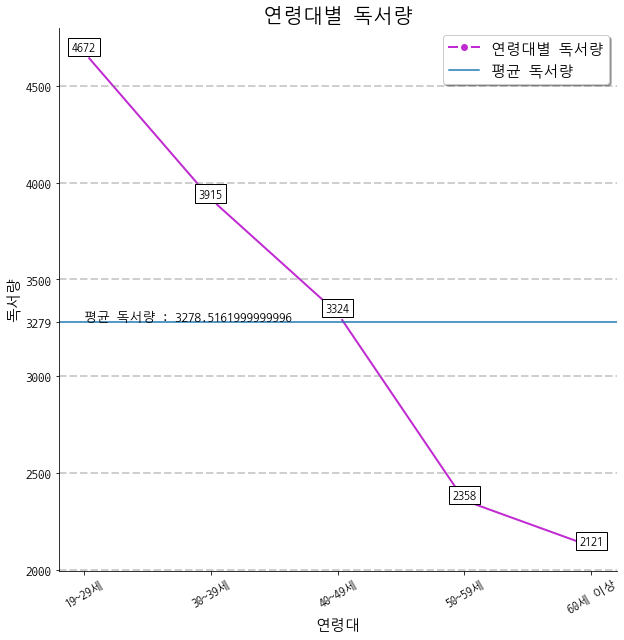

In [62]:
## 눈금선 추가
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
font_path="C:/Windows/Fonts/NanumGothicCoding-Bold.ttf"
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
 
mean_sales = df2['총사례'].mean()
 
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김
 
args_plot = [df2['분류'], df2['총사례']] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='#c02ad1', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
    marker='o', # 마커 모양
    markersize=10, # 마커 사이즈
    markeredgecolor='white', # 마커 테두리 색깔
    markeredgewidth=3, # 마커 테두리 두께
)

line_plot = ax.plot(label='연령대별 독서량', *args_plot,**config_plot) ## 선그래프 생성 - 범례라벨 추가
line_plot = line_plot[0]
 
ax.axhline(mean_sales,label='평균 독서량') ## 평균값을 y좌표로 하는 수평선 생성
ax.text(0,mean_sales+10,f'평균 독서량 : {mean_sales}',fontsize=13) ## 평균 매출 텍스트 출력
 
bbox = dict(
    boxstyle='square',
    facecolor='white',
)
 
for coord in list(line_plot.get_xydata()):
    ax.text(coord[0],coord[1]+10,f'{int(coord[1])}',fontsize=12, ha='center', bbox=bbox)
 
ylim = ax.get_ylim() ## 기존의 y축 범위를 저장
 
yticks = list(ax.get_yticks()) ## y축 눈금을 가져온다.
 
for y in yticks:
    ax.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5) ## 눈금선 생성
 
# 평균값 y 눈금에 추가한다.
yticks.append(mean_sales)
yticks = sorted(yticks)
 
ax.set_yticks(yticks) ## 평균이 포함된 y눈금으로 새롭게 세팅한다.
ax.set_ylim(ylim) ## 기존의 y축 범위를 유지
 
ax.legend(loc='upper right', fontsize=15, shadow=True) ## 범례 생성 - 그림자 효과 추가
 
plt.yticks(fontsize=13) ## y축 눈금 크기 설정
plt.xticks(rotation=30,fontsize=12) ## x축 눈금 회전각도와 크기 설정
 
plt.ylabel('독서량',rotation=90, fontsize=15, color='black') ## y축 라벨
plt.xlabel('연령대',fontsize=15, color='black') ## x축 라벨
plt.title('연령대별 독서량',fontsize=20, color='black') ## 타이틀 설정
plt.show()

In [63]:
df_book = pd.DataFrame()
p_book_a_new3 = p_book_a.loc[4:8]
e_book_a_new3 = e_book_a.loc[4:8]
a_book_a_new3 = a_book_a.loc[4:8]
df_book= pd.concat([df_book,p_book_a_new3 ,e_book_a_new3,a_book_a_new3 ],ignore_index=False)
df_book = df_book.fillna(0)
df_book = df_book.drop(['총사례'],axis=1)
df_book

,분류,2015년,2017년,2019년,2021년
4,19~29세,788.926,786.450,744.128,612.648
5,30~39세,718.572,737.919,702.114,542.732
6,40~49세,743.660,753.942,667.008,498.612
7,50~59세,594.776,621.180,518.520,397.647
8,60세 이상,420.660,693.578,494.865,391.348
4,19~29세,253.258,371.290,412.230,513.080
5,30~39세,132.344,243.117,319.886,370.176
6,40~49세,79.310,168.084,166.752,154.974
7,50~59세,34.580,41.650,58.408,60.996
8,60세 이상,11.400,18.863,31.420,39.652


In [64]:
df_book = df_book.groupby('분류').sum()
df_book

,2015년,2017년,2019년,2021년
분류,,,,
19~29세,1042.184,1157.740,1225.063,1247.648
30~39세,850.916,981.036,1085.364,997.740
40~49세,822.970,922.026,882.396,697.383
50~59세,629.356,662.830,596.000,470.373
60세 이상,432.060,712.441,535.711,441.344


In [65]:
df_book = df_book.T

Text(0.5, 1.0, '연령대별 연도별 독서량')

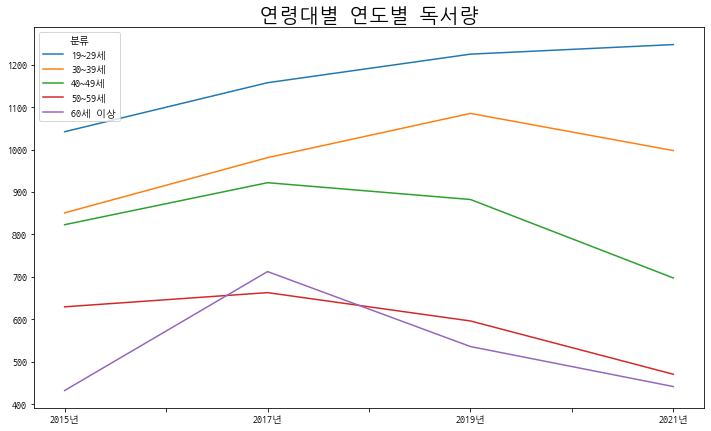

In [66]:
df_book.plot(figsize=(12,7),kind = 'line')
plt.title('연령대별 연도별 독서량',fontsize=20, color='black') ## 타이틀 설정

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [68]:
from matplotlib import font_manager, rc
font_path="C:/Windows/Fonts/NanumGothicCoding-Bold.ttf"
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

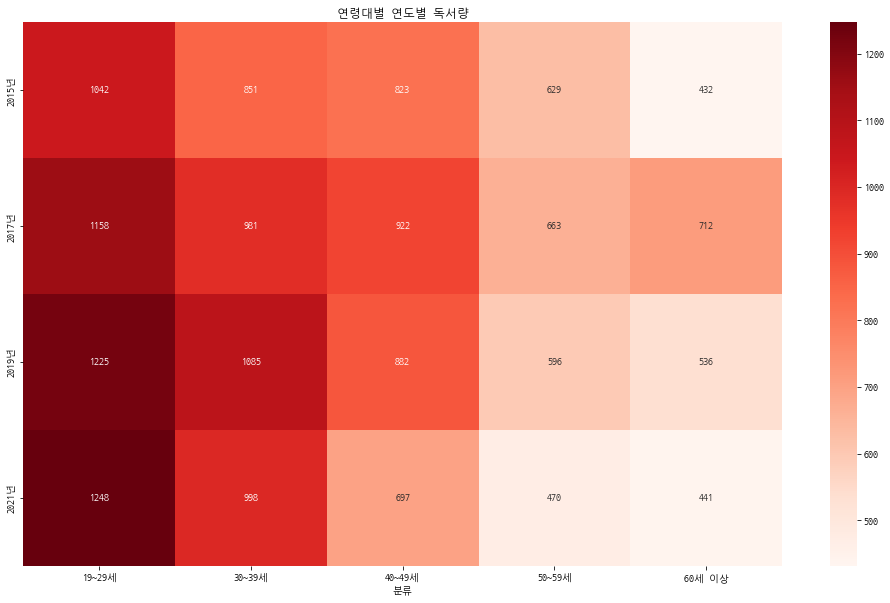

In [69]:
plt.figure(figsize=(17, 10))
# sns.heatmap(pivot, annot=True, fmt=".0f", cmap="PuRd")
sns.heatmap(df_book, annot=True, fmt=".0f", cmap="Reds")
plt.title("연령대별 연도별 독서량")
plt.show()

#### 3 . 성인 학력별 독서량

In [70]:
p_book_a_new4 = p_book_a.loc[9:11]
e_book_a_new4 = e_book_a.loc[9:11]
a_book_a_new4 = a_book_a.loc[9:11]

df_edu = pd.DataFrame()
df_edu= pd.concat([df_edu,p_book_a_new4 ,e_book_a_new4,a_book_a_new4 ],ignore_index=False)
df_edu = df_edu.fillna(0)
df_edu = df_edu.drop(['총사례'],axis=1)
df_edu

,분류,2015년,2017년,2019년,2021년
9,중졸 이하,279.048,442.884,192.404,108.000
10,"고졸, 고퇴",1178.576,1045.160,829.530,623.712
11,대재 이상,1808.940,2103.818,2107.263,1710.228
9,중졸 이하,3.624,14.028,5.604,1.800
10,"고졸, 고퇴",102.816,106.000,148.890,119.616
11,대재 이상,402.960,722.378,834.676,1016.652
9,중졸 이하,0.000,0.000,3.736,0.000
10,고졸/고퇴,0.000,0.000,27.651,29.904
11,대재 이상,0.000,0.000,176.340,243.048


In [71]:
df_edu = df_edu.groupby('분류').sum()
df_edu

,2015년,2017년,2019년,2021년
분류,,,,
"고졸, 고퇴",1281.392,1151.160,978.420,743.328
고졸/고퇴,0.000,0.000,27.651,29.904
대재 이상,2211.900,2826.196,3118.279,2969.928
중졸 이하,282.672,456.912,201.744,109.800


In [72]:
# 인덱스 이름 바꿔주고 
df_edu=df_edu.rename({'고졸/고퇴': '고졸, 고퇴'}, axis=0)
df_edu

,2015년,2017년,2019년,2021년
분류,,,,
"고졸, 고퇴",1281.392,1151.160,978.420,743.328
"고졸, 고퇴",0.000,0.000,27.651,29.904
대재 이상,2211.900,2826.196,3118.279,2969.928
중졸 이하,282.672,456.912,201.744,109.800


In [73]:
# 다시 한번더 groupby
df_edu = df_edu.groupby('분류').sum()
df_edu = df_edu.sort_values(by=['2021년'])


In [74]:
df_edu

,2015년,2017년,2019년,2021년
분류,,,,
중졸 이하,282.672,456.912,201.744,109.800
"고졸, 고퇴",1281.392,1151.160,1006.071,773.232
대재 이상,2211.900,2826.196,3118.279,2969.928


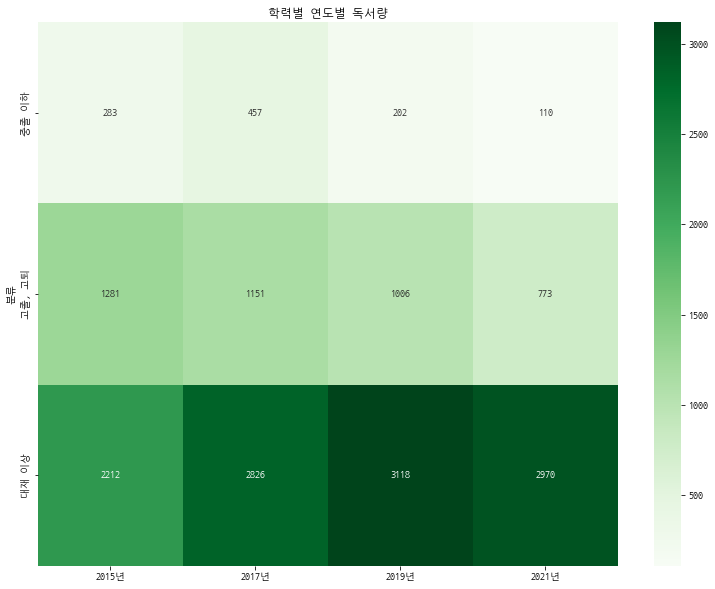

In [75]:
plt.figure(figsize=(13, 10))
# sns.heatmap(pivot, annot=True, fmt=".0f", cmap="PuRd")
sns.heatmap(df_edu, annot=True, fmt=".0f", cmap="Greens")
plt.title("학력별 연도별 독서량")
plt.show()

In [76]:
df_edu['총사례'] = df_edu['2015년']+ df_edu['2017년']+ df_edu['2019년']+ df_edu['2021년']
df_edu

,2015년,2017년,2019년,2021년,총사례
분류,,,,,
중졸 이하,282.672,456.912,201.744,109.800,1051.128
"고졸, 고퇴",1281.392,1151.160,1006.071,773.232,4211.855
대재 이상,2211.900,2826.196,3118.279,2969.928,11126.303


In [77]:
df_edu2= df_edu[['총사례']]
df_edu2

,총사례
분류,
중졸 이하,1051.128
"고졸, 고퇴",4211.855
대재 이상,11126.303


In [78]:
# 귀무가설 : 학력에 따른 독서량 차이가 없다
# 대립가설 : 학력에 따른 독서량 차이가 있다 

### 검증하기
result = stats.chisquare(df_edu2["총사례"])

print("검정결과 = ", result)
print("검정 통계량 = %.3f,   p-value = %.3f" %(result))

# (해석 - 검증결과)
#  1. p-value=0.000 < 0.05 이므로, 대립가설 채택
#  2. 대립가설 채택 : 성인 학력에 따른 독서량 차이가 있다. 

검정결과 =  Power_divergenceResult(statistic=9720.309816660592, pvalue=0.0)
검정 통계량 = 9720.310,   p-value = 0.000


#### 4. 소득수준별 독서량 검증

In [79]:
p_book_a_new5 = p_book_a.loc[12:16]
e_book_a_new5 = e_book_a.loc[12:16]
a_book_a_new5 = a_book_a.loc[12:16]

p_book_a_new5 = p_book_a_new5[['분류','총사례']]
e_book_a_new5 = e_book_a_new5[['분류','총사례']]
a_book_a_new5 = a_book_a_new5[['분류','총사례']]

df_salary = pd.DataFrame()
df_salary= pd.concat([df_salary,p_book_a_new5 ,e_book_a_new5,a_book_a_new5 ],ignore_index=False)
df_salary = df_salary.fillna(0)
df_salary

,분류,총사례
12,200만원 미만,1257.516
13,200~300만원미만,1810.002
14,300~400만원미만,3324.372
15,400~500만원 미만,2963.115
16,500만원 이상,3073.960
12,200만원 미만,147.042
13,200~300만원미만,346.568
14,300~400만원미만,875.312
15,400~500만원 미만,973.155
16,500만원 이상,1139.638


In [80]:
df_salary = df_salary.groupby('분류').sum()
df_salary

,총사례
분류,
200~300만원 미만,28.928
200~300만원미만,2156.570
200만원 미만,1417.432
300~400만원 미만,104.960
300~400만원미만,4199.684
400~500만원 미만,4071.525
500만원 이상,4413.369


In [81]:
# 인덱스 이름 바꿔주고 
df_salary=df_salary.rename({'200~300만원 미만': '200~300만원미만', '300~400만원 미만' :'300~400만원미만' },axis=0)
df_salary

,총사례
분류,
200~300만원미만,28.928
200~300만원미만,2156.570
200만원 미만,1417.432
300~400만원미만,104.960
300~400만원미만,4199.684
400~500만원 미만,4071.525
500만원 이상,4413.369


In [82]:
# 다시 한번더 groupby
df_salary = df_salary.groupby('분류').sum()

In [83]:
df_salary = df_salary.sort_values(by='총사례')

In [84]:
# 귀무가설 : 소득수준에 따른 독서량 차이가 없다
# 대립가설 : 소득수준에 따른 독서량 차이가 있다 

### 검증하기
result = stats.chisquare(df_salary["총사례"])

print("검정결과 = ", result)
print("검정 통계량 = %.3f,   p-value = %.3f" %(result))

# (해석 - 검증결과)
#  1. p-value=0.000 < 0.05 이므로, 대립가설 채택
#  2. 대립가설 채택 : 성인 학력에 따른 독서량 차이가 있다. 

검정결과 =  Power_divergenceResult(statistic=2326.682986035172, pvalue=0.0)
검정 통계량 = 2326.683,   p-value = 0.000


# 이원화 분석 

#### 1. 책 종류와 성별간 독서량 검증

In [85]:
p_book_a_new.rename(columns = {'총사례': '종이책'}, inplace = True)
p_book_a_new

,분류,종이책
2,남성,6077.43
3,여성,6355.813


In [86]:
e_book_a_new.rename(columns = {'총사례': '전자책'}, inplace = True)
e_book_a_new

,분류,전자책
2,남성,1895.953
3,여성,1585.533


In [87]:
a_book_a_new.rename(columns = {'총사례': '오디오북'}, inplace = True)
a_book_a_new

,분류,오디오북
2,남성,224.297
3,여성,255.806


In [88]:
p_book_a_new['전자책'] = e_book_a_new['전자책']
p_book_a_new['오디오북'] = a_book_a_new['오디오북']
gender_sort = p_book_a_new
gender_sort

,분류,종이책,전자책,오디오북
2,남성,6077.43,1895.953,224.297
3,여성,6355.813,1585.533,255.806


In [89]:
# 성별을 숫자로 표현 
gender_sort.loc[2, '분류'] = 1
gender_sort.loc[3, '분류'] = 2
gender_sort

,분류,종이책,전자책,오디오북
2,1,6077.43,1895.953,224.297
3,2,6355.813,1585.533,255.806


In [90]:
### 검정
# 귀무가설 : 성별과 책종류에 대한 독서량은 관련성이 없다.
# 대립가설 : 성별과 책종류에 대한 독서량은 관련성이 있다.
result = stats.chi2_contingency(gender_sort)
print('검정결과 = ',result)
print('검정 통계량 = %.3f , p-value = %.3f'%(result[0], result[1]))

#[해석]
# 1. p-value= 0.000 < .05 이므로 , 귀무가설 기각
# 2. 대립가설 채택 : 성별과 책 종류간에는 관련이 있다.
#                    독립적이지 않다. 

검정결과 =  (36.31230251576143, 6.432083562336267e-08, 3, array([[1.49995682e+00, 6.21644256e+03, 1.74069289e+03, 2.40044590e+02],
       [1.50004318e+00, 6.21680044e+03, 1.74079311e+03, 2.40058410e+02]]))
검정 통계량 = 36.312 , p-value = 0.000


#### 2. 책종류와 연령간 독서량 검증

In [91]:
p_book_a_new2.rename(columns = {'총사례': '종이책'}, inplace = True)
p_book_a_new2['전자책'] = e_book_a_new2['총사례']
p_book_a_new2['오디오북'] = a_book_a_new2['총사례']
p_book_a_new2
age_sort = p_book_a_new2
age_sort

,분류,종이책,전자책,오디오북
4,19~29세,2932.152,1549.858,190.625
5,30~39세,2701.337,1065.523,148.196
6,40~49세,2663.222,569.12,92.433
7,50~59세,2132.123,195.634,30.802
8,60세 이상,2000.451,101.335,19.77


In [92]:
# 성별을 숫자로 표현 
age_sort.loc[4, '분류'] = 1
age_sort.loc[5, '분류'] = 2
age_sort.loc[6, '분류'] = 3
age_sort.loc[7, '분류'] = 4
age_sort.loc[8, '분류'] = 5
age_sort

,분류,종이책,전자책,오디오북
4,1,2932.152,1549.858,190.625
5,2,2701.337,1065.523,148.196
6,3,2663.222,569.12,92.433
7,4,2132.123,195.634,30.802
8,5,2000.451,101.335,19.77


In [93]:
### 검정
# 귀무가설 : 연령과 책종류에 대한 독서량은 관련성이 없다.
# 대립가설 : 연령과 책종류에 대한 독서량은 관련성이 있다.
result = stats.chi2_contingency(age_sort)
print('검정결과 = ',result)
print('검정 통계량 = %.3f , p-value = %.3f'%(result[0], result[1]))

#[해석]
# 1. p-value= 0.000 < .05 이므로 , 귀무가설 기각
# 2. 대립가설 채택 : 연령과 책 종류간에는 관련이 있다.
#                    독립적이지 않다. 

검정결과 =  (1251.4146307309932, 1.4619055589579706e-260, 12, array([[4.27269108e+00, 3.54043301e+03, 9.91683055e+02, 1.37246244e+02],
       [3.58101782e+00, 2.96729941e+03, 8.31147075e+02, 1.15028500e+02],
       [3.04229033e+00, 2.52089957e+03, 7.06109501e+02, 9.77236387e+01],
       [2.15987872e+00, 1.78971654e+03, 5.01303530e+02, 6.93790482e+01],
       [1.94412205e+00, 1.61093647e+03, 4.51226839e+02, 6.24485700e+01]]))
검정 통계량 = 1251.415 , p-value = 0.000


#### 3. 책종류간 학생연령대별 독서량 검증

In [94]:
p_book_s['총사례'] = p_book_s['2015년']+ p_book_s['2017년']+ p_book_s['2019년']+ p_book_s['2021년']
e_book_s['총사례'] = e_book_s['2015년']+ e_book_s['2017년']+ e_book_s['2019년']+ e_book_s['2021년']
a_book_s['총사례'] = a_book_s['2019년']+ a_book_s['2021년']
p_book_s

C:\Users\82102\AppData\Local\Temp\ipykernel_14488\3352427541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_book_s['총사례'] = p_book_s['2015년']+ p_book_s['2017년']+ p_book_s['2019년']+ p_book_s['2021년']
C:\Users\82102\AppData\Local\Temp\ipykernel_14488\3352427541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_book_s['총사례'] = e_book_s['2015년']+ e_book_s['2017년']+ e_book_s['2019년']+ e_book_s['2021년']
C:\Users\82102\AppData\Local\Temp\ipykernel_14488\3352427541.py:3: SettingWithCopyWarning: 
A value 

,분류,2015년,2017년,2019년,2021년,총사례
1,소계,2847.0,3052.693,2835.282,2901.68,11636.655
2,초등학교,839.93,914.76,952.74,1041.044,3748.474
3,중학교,988.95,1003.625,902.26,952.65,3847.485
4,고등학교,1017.995,1131.856,980.368,909.668,4039.887
5,초등학교-남,436.48,469.44,477.596,538.775,1922.291
6,초등학교-여,402.384,445.968,474.825,501.507,1824.684
7,중학교-남,514.08,519.939,451.072,475.44,1960.531
8,중학교-여,473.184,484.746,451.242,477.158,1886.33
9,고등학교-남,525.546,583.74,479.358,446.988,2035.632
10,고등학교-여,492.492,547.2,501.35,462.346,2003.388


In [95]:
p_book_s_new = p_book_s.loc[2:4]
e_book_s_new = e_book_s.loc[2:4]
a_book_s_new = a_book_s.loc[2:4]

p_book_s_new = p_book_s_new[['분류','총사례']]
e_book_s_new = e_book_s_new[['분류','총사례']]
a_book_s_new = a_book_s_new[['분류','총사례']]


In [96]:
p_book_s_new.rename(columns = {'총사례': '종이책'}, inplace = True)
p_book_s_new['전자책'] = e_book_s_new['총사례']
p_book_s_new['오디오북'] = a_book_s_new['총사례']
p_book_s_new

,분류,종이책,전자책,오디오북
2,초등학교,3748.474,1563.263,570.806
3,중학교,3847.485,1464.294,241.28
4,고등학교,4039.887,1569.935,244.328


In [97]:
# 학교를 숫자로 표현 
p_book_s_new.loc[2, '분류'] = 1
p_book_s_new.loc[3, '분류'] = 2
p_book_s_new.loc[4, '분류'] = 3

p_book_s_new

,분류,종이책,전자책,오디오북
2,1,3748.474,1563.263,570.806
3,2,3847.485,1464.294,241.28
4,3,4039.887,1569.935,244.328


In [98]:
### 검정
# 귀무가설 : 학생연령과 책종류에 대한 독서량은 관련성이 없다.
# 대립가설 : 학생연령과 책종류에 대한 독서량은 관련성이 있다.
result = stats.chi2_contingency(p_book_s_new)
print('검정결과 = ',result)
print('검정 통계량 = %.3f , p-value = %.3f'%(result[0], result[1]))

#[해석]
# 1. p-value= 0.000 < .05 이므로 , 귀무가설 기각
# 2. 대립가설 채택 : 학생연령간 책 종류간에는 관련이 있다.
#                    독립적이지 않다. 

검정결과 =  (206.76890645564188, 6.870430491781956e-42, 6, array([[2.04103632e+00, 3.95819738e+03, 1.56394136e+03, 3.59363224e+02],
       [1.92708325e+00, 3.73720732e+03, 1.47662497e+03, 3.39299621e+02],
       [2.03188043e+00, 3.94044129e+03, 1.55692567e+03, 3.57751155e+02]]))
검정 통계량 = 206.769 , p-value = 0.000


In [99]:
p_book_s_new_graph = p_book_s.loc[2:4]
e_book_s_new_graph = e_book_s.loc[2:4]
a_book_s_new_graph = a_book_s.loc[2:4]

In [100]:
book_s_graph = pd.DataFrame()
book_s_graph= pd.concat([book_s_graph,p_book_s_new_graph,e_book_s_new_graph ,a_book_s_new_graph ],ignore_index=False)
book_s_graph = book_s_graph.fillna(0)
book_s_graph = book_s_graph.drop(['총사례'],axis=1)
book_s_graph

,분류,2015년,2017년,2019년,2021년
2,초등학교,839.930,914.760,952.740,1041.044
3,중학교,988.950,1003.625,902.260,952.650
4,고등학교,1017.995,1131.856,980.368,909.668
2,초등학교,284.765,322.245,410.040,546.213
3,중학교,280.029,325.500,301.410,557.355
4,고등학교,248.645,343.970,452.128,525.192
2,초등학교,0.000,0.000,310.545,260.261
3,중학교,0.000,0.000,114.260,127.020
4,고등학교,0.000,0.000,157.904,86.424


In [101]:
book_s_graph = book_s_graph.groupby('분류').sum()
# book_s_graph = book_s_graph.reset_index()
# book_s_graph

In [102]:
book_s_graph

,2015년,2017년,2019년,2021년
분류,,,,
고등학교,1266.640,1475.826,1590.400,1521.284
중학교,1268.979,1329.125,1317.930,1637.025
초등학교,1124.695,1237.005,1673.325,1847.518


In [103]:
book_s_graph = book_s_graph.T

Text(0.5, 1.0, '초,중,고 별 연도별 독서량')

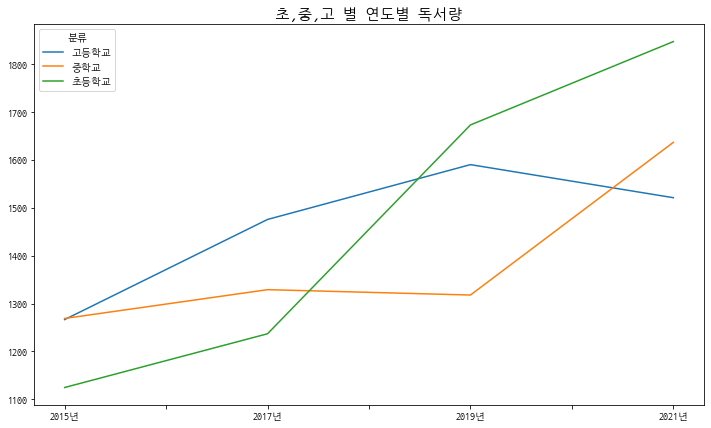

In [104]:
book_s_graph.plot(figsize=(12,7),kind = 'line')
plt.title('초,중,고 별 연도별 독서량',fontsize=15, color='black') ## 타이틀 설정